In [ ]:
import pandas as pd
import keras as keras
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import tensorflow
from tensorflow.keras.layers import LSTM, Dense
import tensorflow as tf
import glob
import numpy as np
import matplotlib.pyplot as plt
import csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!cd '/content/drive/MyDrive/OKN/Master IA/Master IA/TFM/mindwave/FASE3' && pwd
prefix= '/drive/MyDrive/OKN/Master IA/Master IA/TFM/mindwave/FASE3'


Mounted at /content/drive
/content/drive/MyDrive/OKN/Master IA/Master IA/TFM/mindwave/FASE3


In [ ]:


paths = [

    #        str(os.getcwd() +prefix +"/pruebas/preguntas_01-50/javier/ses01/"),
    #            str(os.getcwd() +prefix+"/pruebas/preguntas_01-50/javier/ses02/"),
    #          str(os.getcwd() +prefix+"/pruebas/preguntas_01-50/javier/ses03/") ,
    #  str(os.getcwd() +prefix+"/pruebas/preguntas_01-50/javier/ses04/") ,
    #  str(os.getcwd() +prefix+"/pruebas/preguntas_01-50/javier/ses05/") ,
    # str(os.getcwd() +prefix+"/pruebas/preguntas_01-50/javier/ses06/") ,
    # str(os.getcwd() +prefix+"/pruebas/preguntas_01-50/javier/ses07/") ,
    # str(os.getcwd() +prefix+"/pruebas/fase1_si/javier/ses_test01/") ,
    # str(os.getcwd() +prefix+"/pruebas/fase1_si/javier/ses_test02/") ,
    # str(os.getcwd() +prefix+"/pruebas/fase1_si/javier/ses_test03/") ,
    # str(os.getcwd() +prefix+"/pruebas/fase1_si/javier/ses_train01/") ,

    #        str(os.getcwd() +prefix+"/pruebas/test/javier/ses01/"),  #90
    #           str(os.getcwd() +prefix+"/pruebas/test/javier/ses02/"), #62
    #        str(os.getcwd() +prefix+"/pruebas/test/javier/ses03/"),
    #             str(os.getcwd() +prefix+"/pruebas/test/javier/ses04/"),
    #               str(os.getcwd() +prefix+"/pruebas/test/javier/ses05/"), #100
    #              str(os.getcwd() +prefix+"/pruebas/test/javier/ses06/"),
    #          str(os.getcwd() +prefix+"/pruebas/test/javier/ses07/"),
    #         str(os.getcwd() +prefix+"/pruebas/test/javier/ses08/"),      #60
    #        str(os.getcwd()+prefix +"/pruebas/test/javier/ses09/")   ,
    #              str(os.getcwd()+prefix +"/pruebas/test/javier/ses10/")   ,
    #             str(os.getcwd()+prefix +"/pruebas/test/javier/ses11/")   , #60
    #               str(os.getcwd() +prefix+"/pruebas/test/javier/ses12/")   ,



     str(os.getcwd() +prefix+"/pruebas/preguntas_01-50/silvia/ses01/")     ,
     str(os.getcwd() +prefix+"/pruebas/preguntas_01-50/silvia/ses02/")   ,
            #  str(os.getcwd() +prefix+"/pruebas/preguntas_01-50/silvia/ses03/")     ,#pastillas
         str(os.getcwd() +prefix+"/pruebas/preguntas_01-50/silvia/ses04/")  ,

    str(os.getcwd() +prefix+"/pruebas/test/silvia/ses01/")   ,
    str(os.getcwd() +prefix+"/pruebas/test/silvia/ses02/")      ,
    str(os.getcwd() +prefix+"/pruebas/test/silvia/ses03/")     ,
     str(os.getcwd()+prefix +"/pruebas/test/silvia/ses04/")     , #pastillas
        str(os.getcwd()+prefix +"/pruebas/test/silvia/sesbal/")     ,

        ]

def load_data(paths):
    dfRaw = []
    X_raw_train = []
    y_raw_train =[]
    filter=[]
    filterLastRows = 1000
    # filterLastRows = 1050
    # filterLastRows = 750
    #filterLastRows = 512
    i=0
    # print (paths)
    for path in paths:
        dfHead = pd.read_csv(path + 'head.csv')
        all_raw_files = glob.glob(os.path.join(path , "*_raw*.csv"))
        # print(dfHead[dfHead['questionCode']==24].iloc[0]['response'])

        for filename in all_raw_files:
            dfRaw = pd.read_csv(filename, index_col=None, header=0)
            # np.array(dfRaw)




            # a = len(dfRaw)
            # print ("filename:"+ filename + " " + str(a))
            if len(dfRaw)>filterLastRows:
                qCode = dfRaw['questionCode'].iloc[[0]][0]
                # print(qCode)
                X = np.array(dfRaw.tail(filterLastRows)['rawEeg'])
#ini
                # X_raw_train.append([])
                samples = list()
                # length = 350
                length = 1000
                # length = 350
                #length = 512
                # step over the 5,000 in jumps of 200
                for j in range(0,filterLastRows,length):
                 # grab from i to i + 200
                    sample = X[j:j+length]
                    samples.append(sample)
                # print(len(samples))
                # X=samples

                for ids, X in enumerate(samples):
                    X_raw_train.append([])
#fin
                    for idx, it in enumerate(X):
                        X_raw_train[i].append([])
                        X_raw_train[i][idx].append([])
                        X_raw_train[i][idx][0] = X[idx]
                    y_raw_train.append([])
                    y_raw_train[i].append([])
                    y_raw_train[i][0] = dfHead[dfHead['questionCode']==qCode].iloc[0]['response']
                    i=i+1

    return X_raw_train,y_raw_train


X_raw_train = []
y_raw_train =[]
X_raw_train,y_raw_train= load_data(paths)
X = np.array(X_raw_train)
y = np.array(y_raw_train)
X.shape, y.shape


((142, 1000, 1), (142, 1))

In [ ]:
# 3,4,9 funcionan bien
paths_test = [
#            str(os.getcwd() +"/pruebas/test/javier/ses01/"),  #90
#               str(os.getcwd() +"/pruebas/test/javier/ses02/"), #62
#            str(os.getcwd() +"/pruebas/test/javier/ses03/"),
#                 str(os.getcwd() +"/pruebas/test/javier/ses04/"),
#                   str(os.getcwd() +"/pruebas/test/javier/ses05/"), #100
#                  str(os.getcwd() +"/pruebas/test/javier/ses06/"),
#              str(os.getcwd() +"/pruebas/test/javier/ses07/"),
#             str(os.getcwd() +"/pruebas/test/javier/ses08/"),      #60
#            str(os.getcwd() +"/pruebas/test/javier/ses09/")   ,
#                  str(os.getcwd() +"/pruebas/test/javier/ses10/")   ,
#                 str(os.getcwd() +"/pruebas/test/javier/ses11/")   , #60
#                   str(os.getcwd() +"/pruebas/test/javier/ses12/")   ,


    str(os.getcwd() +"/pruebas/test/silvia/ses01/")   ,
    str(os.getcwd() +"/pruebas/test/silvia/ses02/")      ,
    str(os.getcwd() +"/pruebas/test/silvia/ses03/")     ,
     str(os.getcwd() +"/pruebas/test/silvia/ses04/")     ,
        str(os.getcwd() +"/pruebas/test/silvia/sesbal/")     ,
]


x_test_raw, y_test_raw = load_data(paths_test)

x_test = np.array(x_test_raw)
y_test = np.array(y_test_raw)
x_test.shape

(36, 1000, 1)

In [ ]:


def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)


def get_timed_series(dataArr):
    time_step = []
    data = []
    step=0
    for row in dataArr:
        data.append(float(row))
        # print(row[3])
        time_step.append(step)
        step = step + 1
    return np.array(time_step),np.array(data)


# series = np.array(temps)
# time = np.array(time_step)
input_signal =X[0]
time,series = get_timed_series(input_signal)
plt.figure(figsize=(10, 6))
plot_series(time, series)

# print(y_train[0])

# time,series = get_timed_series(np.array(dfRaw[dfRaw['questionCode']==22].iloc[:,3]))
# plt.figure(figsize=(10, 6))
# plot_series(time, series)



# time,series = get_timed_series(np.array(dfEmot[dfEmot['questionCode']==22].iloc[:,10]))
# plt.figure(figsize=(10, 6))
# plot_series(time, series)


import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal
from python_speech_features import mfcc

fig, ax_list = plt.subplots(nrows=1, figsize=(10, 15), gridspec_kw={'wspace': 0, 'hspace': 0.2}, dpi=100)

window = 75
step = 25

# input_signal = np.array(X_raw_train[dfRaw['questionCode']==1].iloc[:,3])

# print(input_signal)
# Pot MFCC spectrogram of input signal
ax = ax_list
def convert_to_mfccs(wav):
    return mfcc(wav, 1, winstep=step, winlen=window, numcep=26)

data = convert_to_mfccs(input_signal)
print(len(data))
print(data.shape)
# print(data)


presentation_steps = np.arange(data.shape[0])
ax.imshow(data.T, aspect="auto", interpolation="nearest")
ax.set_ylabel("MFCC features")


plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

def get_accuraccy(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test,pred_y)
    a = conf_matrix[0][0] / (conf_matrix[0][0] + conf_matrix[0][1])
    b = conf_matrix[1][1] / (conf_matrix[1][0] + conf_matrix[1][1])
    acc = (a + b)/2
    print ("calc accuracy : " + str(acc))
    return acc

def show_results(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test,pred_y)
    plt.figure(figsize=(2,2))
    labels = ['0: No', '1: Si']
    sns.heatmap(conf_matrix, xticklabels=labels, yticklabels=labels, annot=True, fmt='d')
    plt.title('Confusion matrix')
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print(conf_matrix)
    print(classification_report(y_test,pred_y))
    return


In [ ]:

#Split twice to get the validation set
# X_train_all, X_test, y_train_all, y_test = train_test_split(X, y, test_size=0.25, random_state=123, stratify=y)
# X_train, X_val, y_train, y_val = train_test_split(X_train_all, y_train_all, test_size=0.25, random_state=123, stratify=y)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14)
# X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.25, random_state=234) # 0.25 x 0.8 = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.25) # 0.25 x 0.8 = 0.2


# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, shuffle=True, stratify=y)
#Print the shapes
# X_train.shape,  y_train.shape, X_test.shape, X_val.shape, y_val.shape, len(y_train), len(y_test), len(y_val)

y_val_cat =keras.utils.to_categorical(y_val,2)
y_train_cat =keras.utils.to_categorical(y_train,2)
y_test_cat =keras.utils.to_categorical(y_test,2)

# X_train.shape,  y_train.shape, X_val.shape, y_val.shape, len(y_train),  y_val_cat
# y_val_cat, y_val, y_train, y_train_cat

# y_train_all
X_train.shape, y_train.shape,X_test.shape,y_test.shape,X_val.shape, y_val.shape


((84, 1000, 1), (84, 1), (29, 1000, 1), (29, 1), (29, 1000, 1), (29, 1))

In [ ]:
# model = keras.models.load_model('model_javier_raw_02.keras')

In [ ]:
#model 1
from keras.layers import Conv2D, LeakyReLU
keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

model = keras.Sequential()
input_shape=(X_train.shape[1],X_train.shape[2])

# model.add(keras.layers.Conv1D(filters=32,kernel_size=5,strides=1,padding="causal", activation="relu",input_shape=(X_train.shape[1], 1)))
# input_shape=(None,1)
# model.add(keras.layers.Conv1D(filters=32,kernel_size=5,strides=1,padding="causal", activation="relu",input_shape=input_shape))

model.add(LSTM(64, return_sequences=True,input_shape=input_shape))
# model.add(LSTM(16, return_sequences=True))
# model.add(keras.layers.BatchNormalization())
# model.add(keras.layers.Dropout(0.2))

model.add(LSTM(64))

model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))
model.add(Dense(64, activation='relu'))
# model.add(Dense(64, activation=LeakyReLU()))

# model.add(keras.layers.BatchNormalization())
# model.add(keras.layers.Dropout(0.2))
# # model.add(Dense(64, activation='relu'))
# model.add(Dense(64, activation=LeakyReLU()))

# LeakyReLU()
# model.add(keras.layers.BatchNormalization())
# model.add(keras.layers.Dropout(0.2))

# model.add(Dense(128, activation='relu'))

# model.add(Dense(128, activation='relu'))
# model.add(keras.layers.BatchNormalization())
# model.add(keras.layers.Dropout(0.2))

# model.add(Dense(2, activation='softmax'))
model.add(Dense(2, activation='sigmoid'))
model.summary()

# model.compile(optimizer='adam',loss='SparseCategoricalCrossentropy',metrics=['acc'])
# model.compile(loss = 'categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# model.compile(loss = 'sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1000, 64)          16896     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 2)                 130       
                                                        

Epoch 1/20
3/3 [==============================] - 0s 136ms/step - loss: 0.3331 - accuracy: 0.7976 - val_loss: 0.9528 - val_accuracy: 0.5517
Epoch 2/20
3/3 [==============================] - 0s 76ms/step - loss: 0.3260 - accuracy: 0.8214 - val_loss: 1.0050 - val_accuracy: 0.5517
Epoch 3/20
3/3 [==============================] - 0s 71ms/step - loss: 0.3273 - accuracy: 0.8095 - val_loss: 1.0553 - val_accuracy: 0.4828
Epoch 4/20
3/3 [==============================] - 0s 77ms/step - loss: 0.3207 - accuracy: 0.7857 - val_loss: 1.0989 - val_accuracy: 0.4828
Epoch 5/20
3/3 [==============================] - 0s 78ms/step - loss: 0.3411 - accuracy: 0.8214 - val_loss: 1.1118 - val_accuracy: 0.5172
Epoch 6/20
3/3 [==============================] - 0s 73ms/step - loss: 0.3014 - accuracy: 0.8452 - val_loss: 1.1286 - val_accuracy: 0.5172
Epoch 7/20
3/3 [==============================] - 0s 77ms/step - loss: 0.3250 - accuracy: 0.8571 - val_loss: 1.1461 - val_accuracy: 0.5172
Epoch 8/20
3/3 [==========

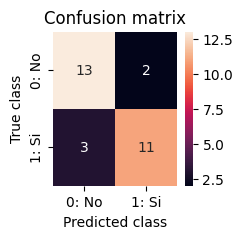

[[13  2]
 [ 3 11]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        15
           1       0.85      0.79      0.81        14

    accuracy                           0.83        29
   macro avg       0.83      0.83      0.83        29
weighted avg       0.83      0.83      0.83        29



In [ ]:
class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy')> 0.56 and logs.get('accuracy')> 0.6):
              print("\nAlcanzado el 85% de precisión, se cancela el entrenamiento!!")
              self.model.stop_training = True
callbacks1 =myCallback()

j=0
acc=0
while j<10 and acc<0.52:
    j=j+1
    history = model.fit(X_train, y_train_cat, epochs=20, validation_data=(X_val, y_val_cat), verbose=1, callbacks=[callbacks1])
    # y_pred2 = [np.argmax(i) for i in model.predict(X_val)]
    # show_results(y_val,y_pred2)
    y_test_pred2 = [np.argmax(i) for i in model.predict(X_test)]
    acc = get_accuraccy(y_test,y_test_pred2)

show_results(y_test,y_test_pred2)

In [ ]:
model.save('model_silvia_raw_14_model1_mixtraintest_83.keras')


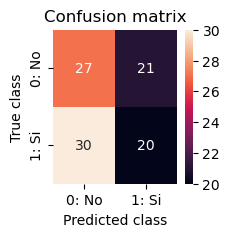

[[27 21]
 [30 20]]
calc accuraracy : 0.48125
              precision    recall  f1-score   support

           0       0.47      0.56      0.51        48
           1       0.49      0.40      0.44        50

    accuracy                           0.48        98
   macro avg       0.48      0.48      0.48        98
weighted avg       0.48      0.48      0.48        98



In [ ]:
show_results(y_test,y_test_pred2)

In [ ]:
# model.save('model_javier_raw_22_model1_1000m_1000len_acc91_val62_alltest58.keras')


In [ ]:
keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
model = keras.Sequential()
input_shape=(X_train.shape[1],X_train.shape[2])
# model.add(keras.layers.Conv1D(filters=32,kernel_size=5,strides=1,padding="causal", activation="relu",input_shape=(X_train.shape[1], 1)))
# input_shape=(None,1)
# model.add(keras.layers.Conv1D(filters=32,kernel_size=5,strides=1,padding="causal", activation="relu",input_shape=input_shape))

model.add(LSTM(32, return_sequences=True,input_shape=input_shape))
# model.add(LSTM(64, return_sequences=True,input_shape=input_shape))
model.add(LSTM(32))
# model.add(LSTM(100, input_shape=(1, 1), return_sequences=True))
model.add(Dense(64, activation='tanh'))
# model.add(Dense(128, activation='tanh'))
model.add(keras.layers.BatchNormalization())

model.add(Dense(64, activation='tanh'))
# model.add(Dense(128, activation='tanh'))
model.add(keras.layers.BatchNormalization())
# model.add(Dense(128, activation='relu'))

model.add(Dense(2, activation='sigmoid'))
model.summary()

# model.compile(optimizer='adam',loss='SparseCategoricalCrossentropy',metrics=['acc'])
# model.compile(loss = 'categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# model.compile(loss = 'sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# history = model.fit(X_train, y_train_cat, epochs=30, validation_data=(X_val, y_val_cat), verbose=1, callbacks=[callbacks])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 750, 32)           4352      
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                       

Epoch 1/10
4/4 [==============================] - ETA: 0s - loss: 0.1819 - accuracy: 0.9394
Alcanzado el 85% de precisión, se cancela el entrenamiento!!
2/2 [==============================] - 0s 89ms/step


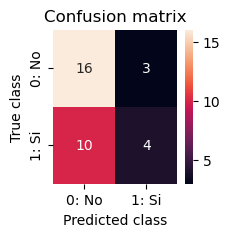

              precision    recall  f1-score   support

           0       0.62      0.84      0.71        19
           1       0.57      0.29      0.38        14

    accuracy                           0.61        33
   macro avg       0.59      0.56      0.55        33
weighted avg       0.60      0.61      0.57        33

4/4 [==============================] - 1s 225ms/step


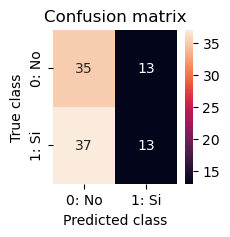

              precision    recall  f1-score   support

           0       0.49      0.73      0.58        48
           1       0.50      0.26      0.34        50

    accuracy                           0.49        98
   macro avg       0.49      0.49      0.46        98
weighted avg       0.49      0.49      0.46        98



In [ ]:
class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy')> 0.6 and logs.get('accuracy')> 0.7):
              print("\nAlcanzado el 85% de precisión, se cancela el entrenamiento!!")
              self.model.stop_training = True
callbacks2 =myCallback()

history = model.fit(X_train, y_train_cat, epochs=10, validation_data=(X_val, y_val_cat), verbose=1, callbacks=[callbacks2])

y_pred2 = [np.argmax(i) for i in model.predict(X_val)]
show_results(y_val,y_pred2)

y_test_pred2 = [np.argmax(i) for i in model.predict(x_test)]
show_results(y_test,y_test_pred2)

In [ ]:
X_train

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
input_shape=(X_train.shape[1],X_train.shape[2])


model = keras.Sequential()
model.add(LSTM(64, activation='tanh',  return_sequences=True,input_shape=(input_shape)))
model.add(LSTM(64, activation='tanh',  return_sequences=True))
model.add(LSTM(64, activation='tanh'))
model.add(keras.layers.BatchNormalization())

model.add(Dense(64, activation='tanh'))
model.add(keras.layers.BatchNormalization())

model.add(Dense(64, activation='tanh'))
model.add(keras.layers.BatchNormalization())

# model.add(Dense(64, activation='tanh'))
# model.add(keras.layers.BatchNormalization())

model.add(Dense(2, activation='sigmoid'))


# model.compile(optimizer='adam',  metrics=['accuracy'])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



# history = model.fit(X_train, y_train_cat, epochs=20, validation_data=(X_val, y_val_cat), verbose=1, callbacks=[callbacks])


Epoch 1/10
4/4 [==============================] - ETA: 0s - loss: 0.2811 - accuracy: 0.8990
Alcanzado el 85% de precisión, se cancela el entrenamiento!!
2/2 [==============================] - 1s 163ms/step


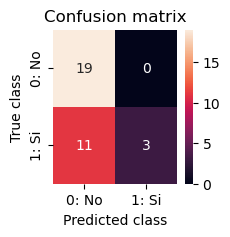

              precision    recall  f1-score   support

           0       0.63      1.00      0.78        19
           1       1.00      0.21      0.35        14

    accuracy                           0.67        33
   macro avg       0.82      0.61      0.56        33
weighted avg       0.79      0.67      0.60        33

4/4 [==============================] - 2s 514ms/step


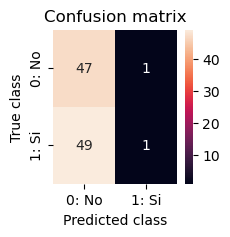

              precision    recall  f1-score   support

           0       0.49      0.98      0.65        48
           1       0.50      0.02      0.04        50

    accuracy                           0.49        98
   macro avg       0.49      0.50      0.35        98
weighted avg       0.49      0.49      0.34        98



In [ ]:
class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy')> 0.6 and logs.get('accuracy')> 0.7):
              print("\nAlcanzado el 85% de precisión, se cancela el entrenamiento!!")
              self.model.stop_training = True
callbacks3 =myCallback()
history = model.fit(X_train, y_train_cat, epochs=10, validation_data=(X_val, y_val_cat), verbose=1, callbacks=[callbacks3])
# history = model.fit(X_train, y_train_cat, epochs=10, verbose=1, callbacks=[callbacks3])

y_pred2 = [np.argmax(i) for i in model.predict(X_val)]
show_results(y_val,y_pred2)

y_test_pred2 = [np.argmax(i) for i in model.predict(x_test)]
show_results(y_test,y_test_pred2)


In [ ]:
X_train, y_train_cat
X_train.shape

(285, 350, 1)

In [ ]:
        # "model = tf.keras.models.Sequential([\n",
        # "  tf.keras.layers.Conv1D(filters=32, kernel_size=5,\n",
        # "                      strides=1, padding=\"causal\",\n",
        # "                      activation=\"relu\",\n",
        # "                      input_shape=[None, 1]),\n",
        # "  tf.keras.layers.LSTM(64, return_sequences=True),\n",
        # "  tf.keras.layers.LSTM(64, return_sequences=True),\n",
        # "  tf.keras.layers.Dense(30, activation=\"relu\"),\n",
        # "  tf.keras.layers.Dense(10, activation=\"relu\"),\n",
        # "  tf.keras.layers.Dense(1),\n",
        # "  tf.keras.layers.Lambda(lambda x: x * 400)\n",

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

input_shape=(X_train.shape[1],X_train.shape[2])

# input_shape=(X_train.shape[1],X_train.shape[2])
# input_shape=(X_train.shape[0],X_train.shape[1],X_train.shape[2])
print(input_shape)

# with tf.compat.v1.Session() as sess0:
# assert not tf.executing_eagerly()
model = keras.Sequential()
# y = tf.keras.layers.Conv1D(32, 3, activation='relu',input_shape=input_shape[1:])(x)model.add(keras.layers.Conv1D(32, kernel_size=(2, 2), activation='relu', input_shape=(input_shape)))
# model.add(keras.layers.Conv1D(32,5, activation='relu'))

model.add(keras.layers.Conv1D(32,5, activation='tanh',input_shape=[None, 1]))
keras.layers.MaxPooling1D(pool_size=2, strides=1, padding="valid")
model.add(keras.layers.Dropout(0.25))
# model.add(keras.layers.Flatten())

# model.add(keras.layers.Conv2D(120, kernel_size=(2, 2), activation='relu'))
# model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
# model.add(keras.layers.BatchNormalization())
# model.add(LSTM(64, activation='tanh', return_sequences=True,input_shape=(input_shape)))
model.add(LSTM(64, activation='tanh',  return_sequences=True))
model.add(LSTM(64, activation='tanh'))


model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.25))


# model.add(keras.layers.Dropout(0.25))
# model.add(keras.layers.Flatten())
# model.add(Dense(64, activation='relu'))
# model.add(keras.layers.Dropout(0.25))

model.add(Dense(64, activation='tanh'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.25))


# model.add(keras.layers.Dropout(0.4))
# model.add(Dense(num_classes, activation='softmax'))
model.add(keras.layers.Dense(2, activation="sigmoid"))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

#Adam, an algorithm


(750, 1)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, None, 32)          192       
                                                                 
 dropout (Dropout)           (None, None, 32)          0         
                                                                 
 lstm (LSTM)                 (None, None, 64)          24832     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                               

Epoch 1/10
4/4 [==============================] - 5s 1s/step - loss: 0.7521 - accuracy: 0.5758 - val_loss: 0.7545 - val_accuracy: 0.3939
Epoch 2/10
4/4 [==============================] - 5s 1s/step - loss: 0.6983 - accuracy: 0.5859 - val_loss: 0.7638 - val_accuracy: 0.3939
Epoch 3/10
4/4 [==============================] - 5s 1s/step - loss: 0.6634 - accuracy: 0.5960 - val_loss: 0.7718 - val_accuracy: 0.4242
Epoch 4/10
4/4 [==============================] - 5s 1s/step - loss: 0.7207 - accuracy: 0.6667 - val_loss: 0.7704 - val_accuracy: 0.4242
Epoch 5/10
4/4 [==============================] - 5s 1s/step - loss: 0.7265 - accuracy: 0.5960 - val_loss: 0.7526 - val_accuracy: 0.4545
Epoch 6/10
4/4 [==============================] - 5s 1s/step - loss: 0.7104 - accuracy: 0.6263 - val_loss: 0.7326 - val_accuracy: 0.4242
Epoch 7/10
4/4 [==============================] - 5s 1s/step - loss: 0.6895 - accuracy: 0.5859 - val_loss: 0.7097 - val_accuracy: 0.4242
Epoch 8/10
4/4 [=========================

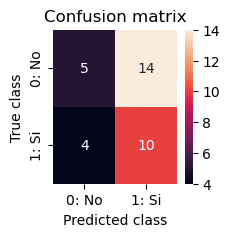

              precision    recall  f1-score   support

           0       0.56      0.26      0.36        19
           1       0.42      0.71      0.53        14

    accuracy                           0.45        33
   macro avg       0.49      0.49      0.44        33
weighted avg       0.50      0.45      0.43        33

4/4 [==============================] - 2s 408ms/step


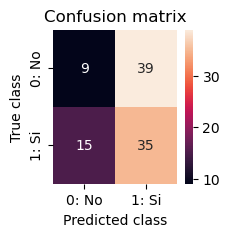

              precision    recall  f1-score   support

           0       0.38      0.19      0.25        48
           1       0.47      0.70      0.56        50

    accuracy                           0.45        98
   macro avg       0.42      0.44      0.41        98
weighted avg       0.42      0.45      0.41        98



In [ ]:
class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy')> 0.6 and logs.get('accuracy')> 0.6):
              print("\nAlcanzado el 85% de precisión, se cancela el entrenamiento!!")
              self.model.stop_training = True
callbacks4 =myCallback()
# history = model.fit(X_train.astype(np.float32), y_train_cat, epochs=10, validation_data=(X_val.astype(np.float32), y_val_cat), verbose=1, callbacks=[callbacks4])
history = model.fit(X_train, y_train_cat, epochs=10, validation_data=(X_val, y_val_cat), verbose=1, callbacks=[callbacks4])

# history = model.fit(X_train, y_train_cat, epochs=10, verbose=1, callbacks=[callbacks3])


y_pred2 = [np.argmax(i) for i in model.predict(X_val)]
show_results(y_val,y_pred2)

y_test_pred2 = [np.argmax(i) for i in model.predict(x_test)]
show_results(y_test,y_test_pred2)

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
input_shape=(X_train.shape[1],X_train.shape[2])

print(input_shape)

model = keras.Sequential()

model.add(LSTM(64, activation='tanh',  return_sequences=False,input_shape=(input_shape)))

model.add(keras.layers.BatchNormalization())

model.add(Dense(64, activation='tanh'))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dense(2, activation="sigmoid"))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


(1000, 1)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dense_1 (Dense)             (None, 2)                 130       
                                                                 
Total params: 21698 (84.76 KB)
Trainable param

Epoch 1/20
5/5 [==============================] - ETA: 0s - loss: 0.3118 - accuracy: 0.8889
Alcanzado el 85% de precisión, se cancela el entrenamiento!!
2/2 [==============================] - 0s 65ms/step
calc accuracy : 0.521255060728745
Epoch 1/20
5/5 [==============================] - ETA: 0s - loss: 0.2985 - accuracy: 0.8889
Alcanzado el 85% de precisión, se cancela el entrenamiento!!
2/2 [==============================] - 0s 66ms/step
calc accuracy : 0.5020242914979757
Epoch 1/20
5/5 [==============================] - 2s 316ms/step - loss: 0.2861 - accuracy: 0.8889 - val_loss: 0.7235 - val_accuracy: 0.5778
Epoch 2/20
5/5 [==============================] - ETA: 0s - loss: 0.3052 - accuracy: 0.8667
Alcanzado el 85% de precisión, se cancela el entrenamiento!!
2/2 [==============================] - 0s 67ms/step
calc accuracy : 0.5020242914979757
Epoch 1/20
5/5 [==============================] - 3s 558ms/step - loss: 0.2686 - accuracy: 0.9037 - val_loss: 0.7369 - val_accuracy: 0.5778
E

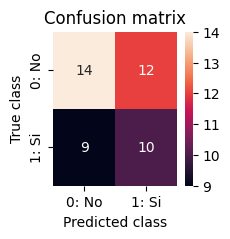

[[14 12]
 [ 9 10]]
              precision    recall  f1-score   support

           0       0.61      0.54      0.57        26
           1       0.45      0.53      0.49        19

    accuracy                           0.53        45
   macro avg       0.53      0.53      0.53        45
weighted avg       0.54      0.53      0.54        45



In [ ]:
from keras.callbacks import CSVLogger

class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy')> 0.58 and logs.get('accuracy')> 0.67):
              print("\nAlcanzado el 85% de precisión, se cancela el entrenamiento!!")
              self.model.stop_training = True
callbacks5 =myCallback()
csv_logger = CSVLogger('training.log', separator=',', append=False)





j=0
acc=0
while j<10 and acc<0.53:
    j=j+1
    # history = model.fit(X_train.astype(np.float32), y_train_cat, epochs=10, validation_data=(X_val.astype(np.float32), y_val_cat), verbose=1, callbacks=[callbacks4])
    history = model.fit(X_train, y_train_cat, epochs=20, validation_data=(X_val, y_val_cat), verbose=1, callbacks=[callbacks5,csv_logger])

    # y_pred2 = [np.argmax(i) for i in model.predict(X_val)]
    # show_results(y_val,y_pred2)


    y_test_pred2 = [np.argmax(i) for i in model.predict(X_test)]
    acc = get_accuraccy(y_test,y_test_pred2)

show_results(y_test,y_test_pred2)


In [ ]:
# model.save('model_silvia_raw_11_model5_1000m_1000len_acc84_val60_alltestbal67.keras')
# model = keras.models.load_model('model_javier_raw_03_.keras')
model.save('model_javier_raw_20_model5_mixtesttrain_60.keras')

1/1 [==============================] - 1s 629ms/step


In [ ]:
y_pred = model.predict(X_val)
y_pred2 = [np.argmax(i) for i in y_pred]
# y_val2=  [np.argmax(i) for i in y_val_cat]
show_results(y_val,y_pred2)

In [ ]:
history = model.fit(X_train, y_train_cat, epochs=10, batch_size=16, validation_data=(X_val, y_val_cat), shuffle=True, callbacks=[callbacks])


Epoch 1/10
6/6 [==============================] - 5s 768ms/step - loss: 0.0861 - accuracy: 0.9885 - val_loss: 0.7630 - val_accuracy: 0.6552
Epoch 2/10
6/6 [==============================] - 4s 756ms/step - loss: 0.0886 - accuracy: 0.9885 - val_loss: 0.8939 - val_accuracy: 0.6207
Epoch 3/10
6/6 [==============================] - ETA: 0s - loss: 0.0675 - accuracy: 0.9885
Alcanzado el 85% de precisión, se cancela el entrenamiento!!
6/6 [==============================] - 6s 1s/step - loss: 0.0675 - accuracy: 0.9885 - val_loss: 0.8050 - val_accuracy: 0.6897


In [ ]:
 # model.save('model_javier_raw_05_7train_acc93_val756_alltest60.keras')
model = keras.models.load_model('model_javier_raw_05_7train_acc93_val75_alltest62.keras') # 750 muestras
# model = keras.models.load_model('model_javier_raw_03_4train_acc85_val85_test62.keras')
# model = keras.models.load_model('model_javier_raw_04_7train_acc86_val56_alltest60.keras')

In [ ]:
[print(i.shape, i.dtype) for i in model.inputs]
[print(o.shape, o.dtype) for o in model.outputs]
[print(l.name, l.input_shape, l.dtype) for l in model.layers]

(None, 350, 1) <dtype: 'float32'>
(None, 2) <dtype: 'float32'>
lstm (None, 350, 1) float32
lstm_1 (None, 350, 32) float32
lstm_2 (None, 350, 32) float32
batch_normalization (None, 32) float32
dense (None, 32) float32
batch_normalization_1 (None, 64) float32
dense_1 (None, 64) float32
batch_normalization_2 (None, 64) float32
dense_2 (None, 64) float32


[None, None, None, None, None, None, None, None, None]

In [ ]:
 # model.save('model_javier_raw_05_7train_acc93_val756_alltest60.keras')
# model = keras.models.load_model('model_javier_raw_19_model5_1000m_acc100_val40_alltest58.keras')
model = keras.models.load_model('model_silvia_raw_05_model5_1050m_acc98_val60_alltest58.keras')

# model = keras.models.load_model('model_javier_raw_03_4train_acc85_val85_test62.keras')
# model = keras.models.load_model('model_javier_raw_04_7train_acc86_val56_alltest60.keras') #57
# model = keras.models.load_model('model_javier_raw_06_alltest51.keras')

# model = history.model
y_test_pred = model.predict(x_test)
y_test_pred2 = [np.argmax(i) for i in y_test_pred]
show_results(y_test,y_test_pred2)
print(model.metrics_names)
model.summary()
model.to_json()

ValueError: in user code:

    File "C:\Users\javis\anaconda3\lib\site-packages\keras\src\engine\training.py", line 2416, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\javis\anaconda3\lib\site-packages\keras\src\engine\training.py", line 2401, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\javis\anaconda3\lib\site-packages\keras\src\engine\training.py", line 2389, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\javis\anaconda3\lib\site-packages\keras\src\engine\training.py", line 2357, in predict_step
        return self(x, training=False)
    File "C:\Users\javis\anaconda3\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\javis\anaconda3\lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 350, 1), found shape=(None, 1000, 1)


In [ ]:
# y_test_pred
# y_val2=  [np.argmax(i) for i in y_val_cat]
# y_test_pred2
# y_test,y_test_raw
# [np.argmax(i) for i in y_test_raw]

# y_test
# y_test_pred2

In [ ]:
# y_test